In [2]:
import pandas as pd
accounts_v2= pd.read_csv("accounts_v2.csv")

In [3]:
df = pd.read_csv("accounts_v2.csv")

In [4]:
region_3_row = df[df['region'] == 'Region 3']

In [5]:
print(region_3_row)

         account_number    region
2               5612021  Region 3
4               3748075  Region 3
9               1308410  Region 3
16              1351884  Region 3
19              4072490  Region 3
...                 ...       ...
1399974         1225144  Region 3
1399982         7948626  Region 3
1399986         2535289  Region 3
1399991         3247885  Region 3
1399996         3643755  Region 3

[289821 rows x 2 columns]


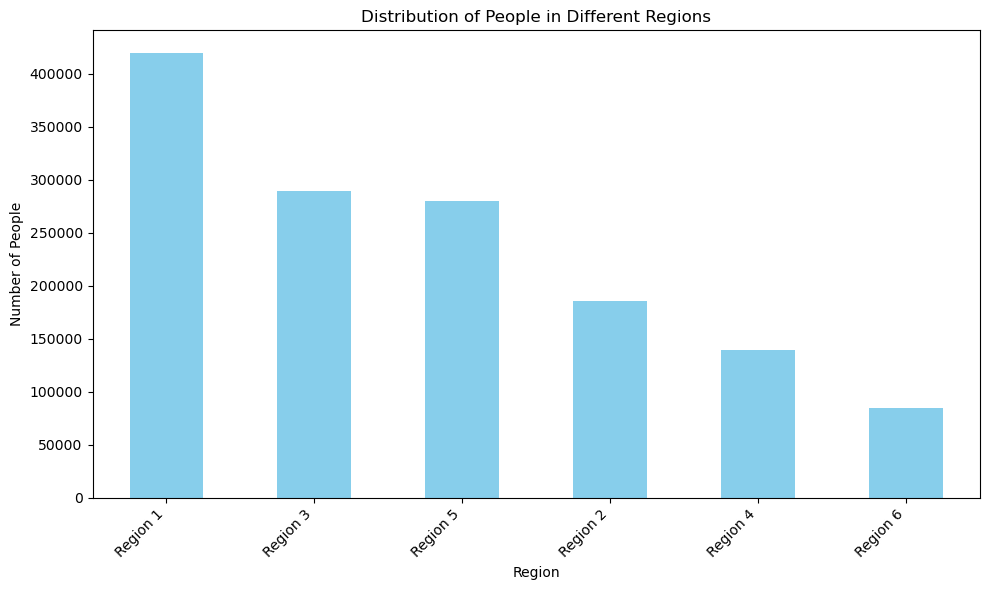

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("accounts_v2.csv")

# Count the number of occurrences of each region
region_counts = df['region'].value_counts()

# Plot the distribution graph
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of People in Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
# Count the number of occurrences of each region
region_counts = df['region'].value_counts()

# Print the exact number of people in each region along with the region name
for region, count in region_counts.items():
    print(f"Region: {region}, Number of People: {count}")

Region: Region 1, Number of People: 419973
Region: Region 3, Number of People: 289821
Region: Region 5, Number of People: 279780
Region: Region 2, Number of People: 185705
Region: Region 4, Number of People: 139613
Region: Region 6, Number of People: 85108


In [18]:
# Count the number of occurrences of each region
region_counts = df['region'].value_counts()

# Define a dictionary to map region names to their counts
region_dict = {
    'Region 1': 0,
    'Region 2': 0,
    'Region 3': 0,
    'Region 4': 0,
    'Region 5': 0,
    'Region 6': 0
}

# Update the counts in the dictionary
for region, count in region_counts.items():
    region_dict[region] = count

# Print the regions and their counts
for region, count in region_dict.items():
    print(f"{region} : {count} people")

Region 1 : 419973 people
Region 2 : 185705 people
Region 3 : 289821 people
Region 4 : 139613 people
Region 5 : 279780 people
Region 6 : 85108 people


In [8]:
sorted_df = df.sort_values(by=['account_number', 'region'])
sorted_df.to_csv("sorted_account.csv", index=False)
print("Sorted data saved to sorted_account.csv")

Sorted data saved to sorted_account.csv


In [9]:
df = pd.read_csv("tickets_v2.csv")
# Convert the date column to datetime data type
summary_df = df.groupby(['account_number', 'tag']).apply(list).reset_index()
summary_df.to_csv("sorted_tickets.csv", index=False)

#print(summary_df)
print("DataFrame saved to sorted_tickets.csv")


DataFrame saved to sorted_tickets.csv


In [10]:
df = pd.read_csv('sorted_tickets.csv')
# Group by 'account_number' and count occurrences, then sort by count in descending order
sorted_accounts = df.groupby('account_number').size().sort_values(ascending=False)
# Extract the most frequent account number
most_frequent_account = sorted_accounts.index[0]
# Filter the DataFrame to get rows with the most frequent account number
filtered_df = df[df['account_number'] == most_frequent_account]
# Sort the filtered DataFrame by 'date' in ascending order
sorted_filtered_df = filtered_df.sort_values(by='tag')
print(sorted_filtered_df)


        account_number         tag                          0
613835         6383210  2019-08-03  ['tag', 'account_number']
613836         6383210  2019-12-18  ['tag', 'account_number']
613837         6383210  2020-03-10  ['tag', 'account_number']
613838         6383210  2021-06-16  ['tag', 'account_number']
613839         6383210  2021-07-23  ['tag', 'account_number']
613840         6383210  2021-08-12  ['tag', 'account_number']
613841         6383210  2021-10-24  ['tag', 'account_number']
613842         6383210  2021-10-28  ['tag', 'account_number']
613843         6383210  2021-11-15  ['tag', 'account_number']


In [11]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('sorted_tickets.csv')

# Group by 'account_number' and count occurrences, and get the earliest 'date'
grouped_df = df.groupby('account_number').agg(appearances=('account_number', 'size'), date=('tag', 'min')).reset_index()

# Sort by 'appearances' in descending order, 'date' in ascending order, and 'account_number' in ascending order
sorted_df = grouped_df.sort_values(by=['appearances', 'date', 'account_number'], ascending=[False, True, True])

# Save the sorted DataFrame to a new CSV file
sorted_df.to_csv('sorted_occurrences.csv', index=False)

In [14]:
sorted_occurrences_df = pd.read_csv('sorted_occurrences.csv')
sorted_accounts_df = pd.read_csv('sorted_account.csv')
merged_df = pd.merge(sorted_occurrences_df, sorted_accounts_df[['account_number', 'region']], on='account_number', how='left')
merged_df.to_csv('merged_occurrences_with_regions.csv', index=False)

In [17]:
df = pd.read_csv('merged_occurrences_with_regions.csv')

# Calculate average appearances per region
avg_appearances_per_region = df.groupby('region')['appearances'].mean()

# Calculate total appearances per region
total_appearances_per_region = df.groupby('region')['appearances'].sum()

# Calculate the date range for each region
date_range_per_region = df.groupby('region')['date'].agg(['min', 'max'])

# Print results
print("Average Tickets Appearances per Region:")
print(avg_appearances_per_region)
print("\nTotal Tickets Appearances per Region:")
print(total_appearances_per_region)
print("\nDate Range per Region:")
print(date_range_per_region)


Average Tickets Appearances per Region:
region
Region 1    1.502522
Region 2    1.500460
Region 3    1.553980
Region 4    1.495296
Region 5    1.497201
Region 6    1.540765
Name: appearances, dtype: float64

Total Tickets Appearances per Region:
region
Region 1    342270
Region 2    151674
Region 3    262893
Region 4    113472
Region 5    228136
Region 6     75234
Name: appearances, dtype: int64

Date Range per Region:
                 min         max
region                          
Region 1  2019-01-01  2022-01-01
Region 2  2019-01-01  2022-01-01
Region 3  2019-01-01  2022-01-01
Region 4  2019-01-01  2022-01-01
Region 5  2019-01-01  2022-01-01
Region 6  2019-01-01  2022-01-01
